In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.2 MB/s eta 0:00:00


In [2]:
# deutsch_custom_oracle.py
# Deutsch Algorithm with custom oracle: f(x) = x XOR 1
# Qiskit 2.x Compatible

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def deutsch_oracle(qc):
    """Implements f(x) = x XOR 1"""
    qc.x(1)         # Flip output qubit
    qc.cx(0, 1)     # Apply CNOT (f(x)=x⊕1)

# Step 1: Initialize circuit
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.barrier()
qc.h([0, 1])

# Step 2: Apply oracle
qc.barrier()
deutsch_oracle(qc)

# Step 3: Apply Hadamard and measure
qc.barrier()
qc.h(0)
qc.measure(0, 0)

print(qc.draw(output='text'))

# Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


           ░ ┌───┐ ░            ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░────────■───░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ ┌───┐┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║ 
c: 1/═══════════════════════════════════╩═
                                        0 

Measurement results: {'1': 1024}
→ Function is BALANCED.


In [4]:
# TASK 1 – Custom Oracle Design

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def deutsch_oracle(qc):
    qc.x(1)
    qc.cx(0, 1)

qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
deutsch_oracle(qc)
qc.h(0)
qc.measure(0, 0)

print(qc.draw(output='text'))

sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()
print("Measurement results:", counts)

if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


     ┌───┐               ┌───┐┌─┐
q_0: ┤ H ├────────────■──┤ H ├┤M├
     ├───┤┌───┐┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫─
     └───┘└───┘└───┘└───┘      ║ 
c: 1/══════════════════════════╩═
                               0 
Measurement results: {'1': 1024}
→ Function is BALANCED.


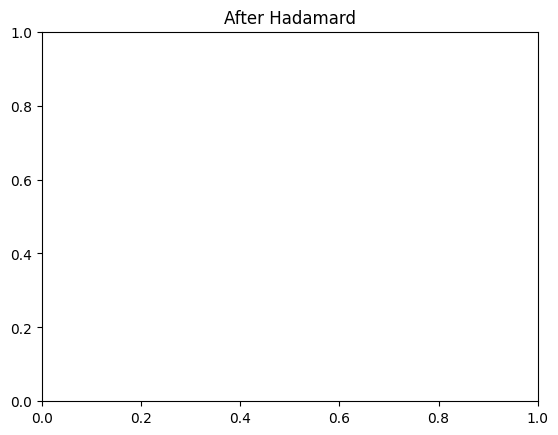

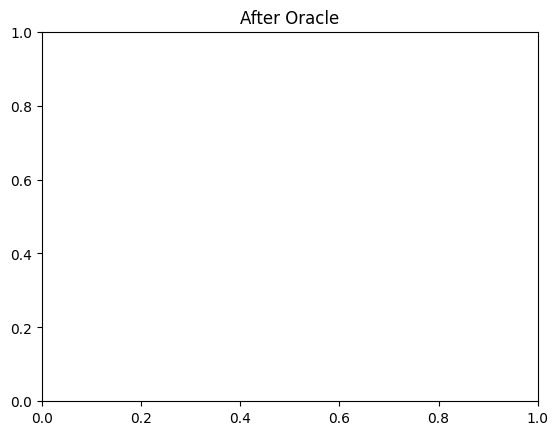

In [5]:
#  TASK 2 – Bloch Sphere Visualization

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

def deutsch_oracle(qc):
    qc.cx(0, 1)  # f(x)=x

qc = QuantumCircuit(2)
qc.x(1)
qc.h([0, 1])

# After Hadamard
state_h = Statevector(qc)
plot_bloch_multivector(state_h)
plt.title("After Hadamard")
plt.show()

# After Oracle
deutsch_oracle(qc)
state_oracle = Statevector(qc)
plot_bloch_multivector(state_oracle)
plt.title("After Oracle")
plt.show()


In [6]:
# TASK 3 – Deutsch–Jozsa Extension (2 Input Qubits)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def balanced_oracle(qc):
    qc.cx(0, 2)
    qc.cx(1, 2)

def constant_oracle(qc):
    pass  # f(x1, x2) = 0

n = 2
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(range(n + 1))
balanced_oracle(qc)
qc.h(range(n))
qc.measure(range(n), range(n))

print(qc.draw(output='text'))

sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("Measurement results:", counts)
if '00' in counts:
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


     ┌───┐          ┌───┐     ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───
     ├───┤       │  └───┘┌───┐└╥┘┌─┐
q_1: ┤ H ├───────┼────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1 
Measurement results: {'11': 1024}
→ Function is BALANCED.


In [7]:
#  TASK 4 – Noise Impact

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

def deutsch_oracle(qc):
    qc.cx(0, 1)  # Balanced oracle

qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
deutsch_oracle(qc)
qc.h(0)
qc.measure(0, 0)

# Add depolarizing noise
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 2), ['cx'])

sim = AerSimulator(noise_model=noise_model)
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled, shots=1024).result()
counts = result.get_counts()

print(qc.draw(output='text'))
print("Measurement results with noise:", counts)


     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 
Measurement results with noise: {'1': 925, '0': 99}


In [8]:
# TASK 5 – Compare Classical vs Quantum Queries
import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Classical function check
def classical_check(f):
    return f(0) == f(1)

# Quantum oracle
def deutsch_oracle(qc, f_type):
    if f_type == 'balanced':
        qc.cx(0, 1)
    else:
        pass

f_type = random.choice(['balanced', 'constant'])
print(f"Randomly chosen function type: {f_type}")

# Classical evaluation
print("Classical algorithm: 2 queries needed.")

# Quantum Deutsch algorithm
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0, 1])
deutsch_oracle(qc, f_type)
qc.h(0)
qc.measure(0, 0)

sim = AerSimulator()
qc_compiled = transpile(qc, sim)
counts = sim.run(qc_compiled).result().get_counts()

print("Quantum result:", counts)
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")
print("Quantum algorithm: 1 query needed.")


Randomly chosen function type: balanced
Classical algorithm: 2 queries needed.
Quantum result: {'1': 1024}
→ Function is BALANCED.
Quantum algorithm: 1 query needed.
